In [1]:
# import matplotlib
# matplotlib.use("TkAgg")  # fix for macOS
from matplotlib import pyplot as plt
import glob, os
import sys
from skimage import io, exposure
from tqdm import tqdm
import numpy as np

In [2]:
def read_tiff(file):
    im = io.imread(file)
    im = im[:, :, [3, 2, 1]]
    # a tiff file contains the raw channels: return [B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B10,B11,B12]
    # a rgb images needs the following channels:  return [B04, B03, B02]
    # ==> index [3, 2, 1]

    im = exposure.rescale_intensity(im)
    return im

In [3]:
path = 'fullandpartial/good'
search_path = os.path.join(path,"*.tiff")
n_files = len(glob.glob(search_path))
un_pix, m_pix, sd_pix = [], [], []
files = []

for i, file in tqdm(enumerate(glob.glob(search_path)), total=n_files):
    files.append(file.split('/')[-1])
    
    im = read_tiff(file)
    
    un_pix.append(len(np.unique(im)))
    m_pix.append(np.mean(im))
    sd_pix.append(np.std(im))

100%|██████████| 1335/1335 [03:33<00:00,  7.35it/s]


In [5]:
not_good_name = [
    '7480244118-A_BANDS-S2-L1C.tiff', 
    '4800146949-A_BANDS-S2-L1C.tiff', 
    '5630426937-A_BANDS-S2-L1C.tiff', 
    '6360376791-A_BANDS-S2-L1C.tiff', 
    '8530247088-A_BANDS-S2-L1C.tiff', 
    '6360376993-A_BANDS-S2-L1C.tiff', 
    '6360376690-A_BANDS-S2-L1C.tiff', 
    '6170174242-A_BANDS-S2-L1C.tiff', 
    '7480087908-A_BANDS-S2-L1C.tiff', 
    '4800310334-A_BANDS-S2-L1C.tiff', 
    '4760306423-A_BANDS-S2-L1C.tiff', 
    '5351148678-A_BANDS-S2-L1C.tiff', 
    '4230298423-A_BANDS-S2-L1C.tiff', 
    '3170187746-A_BANDS-S2-L1C.tiff', 
    '2560213552-A_BANDS-S2-L1C.tiff', 
    '5010091325-A_BANDS-S2-L1C.tiff', 
    '5820143375-A_BANDS-S2-L1C.tiff', 
    '6170093309-A_BANDS-S2-L1C.tiff'
]
not_good_i = []
for file_name in not_good_name:
    not_good_i.append(files.index(file_name))

In [6]:
good_name = [
    '4360073006-A_BANDS-S2-L1C.tiff',
    '8590010105-A_BANDS-S2-L1C.tiff',
    '6260086370-A_BANDS-S2-L1C.tiff',
    '9120134303-A_BANDS-S2-L1C.tiff',
    '7610614845-A_BANDS-S2-L1C.tiff',
    '7610625454-A_BANDS-S2-L1C.tiff',
    '1030222751-A_BANDS-S2-L1C.tiff',
    '0190145460-A_BANDS-S2-L1C.tiff',
    '4940020444-A_BANDS-S2-L1C.tiff',
    '3170382958-A_BANDS-S2-L1C.tiff',
    '5040054827-A_BANDS-S2-L1C.tiff',
    '7460641226-A_BANDS-S2-L1C.tiff',
    '7080447100-A_BANDS-S2-L1C.tiff',
    '6170051778-A_BANDS-S2-L1C.tiff',
    '7460640014-A_BANDS-S2-L1C.tiff',
    '4940156951-A_BANDS-S2-L1C.tiff'
]
good_i = []
for file_name in good_name:
    good_i.append(files.index(file_name))

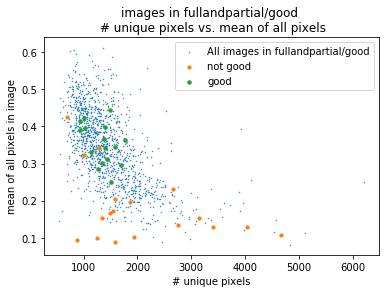

In [35]:
plt.scatter(un_pix,m_pix, s=0.2, label=f'All images in {path}')
plt.scatter([un_pix[i] for i in not_good_i],[m_pix[i] for i in not_good_i], s=10, label='not good')
plt.scatter([un_pix[i] for i in good_i],[m_pix[i] for i in good_i], s=12, label='good')
plt.xlabel('# unique pixels')
plt.ylabel('mean of all pixels in image')
plt.title(f'images in {path} \n # unique pixels vs. mean of all pixels')
plt.legend()

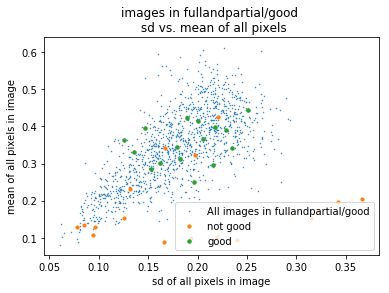

In [36]:
plt.scatter(sd_pix,m_pix, s=0.2, label=f'All images in {path}')
plt.scatter([sd_pix[i] for i in not_good_i],[m_pix[i] for i in not_good_i], s=10, label='not good')
plt.scatter([sd_pix[i] for i in good_i],[m_pix[i] for i in good_i], s=12, label='good')
plt.xlabel('sd of all pixels in image')
plt.ylabel('mean of all pixels in image')
plt.title(f'images in {path} \n sd vs. mean of all pixels')
plt.legend()

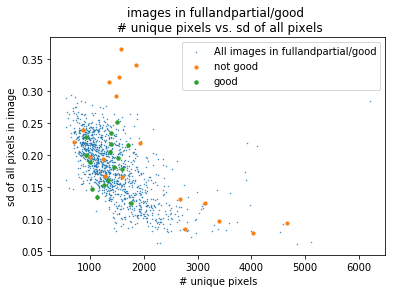

In [37]:
plt.scatter(un_pix,sd_pix, s=0.2, label=f'All images in {path}')
plt.scatter([un_pix[i] for i in not_good_i],[sd_pix[i] for i in not_good_i], s=10, label='not good')
plt.scatter([un_pix[i] for i in good_i],[sd_pix[i] for i in good_i], s=12, label='good')
plt.xlabel('# unique pixels')
plt.ylabel('sd of all pixels in image')
plt.title(f'images in {path} \n # unique pixels vs. sd of all pixels')
plt.legend()

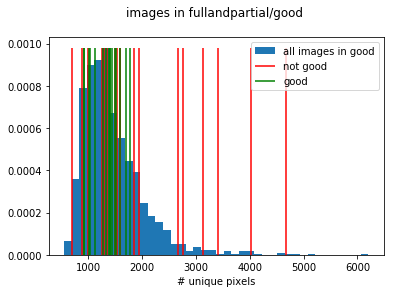

In [41]:
hist = plt.hist(un_pix, bins=40, density=True, label='all images in good');
plt.vlines([un_pix[i] for i in not_good_i], 0, hist[0].max(), label='not good', colors='r')
plt.vlines([un_pix[i] for i in good_i], 0, hist[0].max(), label='good', colors='g')
plt.xlabel('# unique pixels')
plt.title(f'images in {path} \n ')
plt.legend()

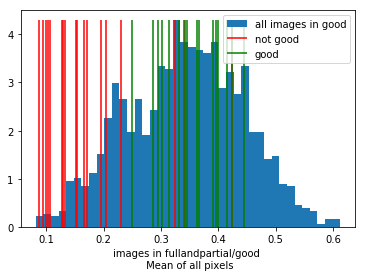

In [39]:
hist = plt.hist(m_pix, bins=40, density=True, label='all images in good');
plt.vlines([m_pix[i] for i in not_good_i], 0, hist[0].max(), label='not good', colors='r')
plt.vlines([m_pix[i] for i in good_i], 0, hist[0].max(), label='good', colors='g')
plt.xlabel('Mean of all pixels')
plt.title(f'images in {path} \n ')
plt.legend()

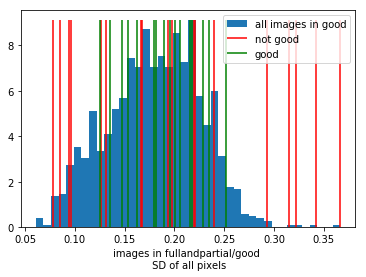

In [40]:
hist = plt.hist(sd_pix, bins=40, density=True, label='all images in good');
plt.vlines([sd_pix[i] for i in not_good_i], 0, hist[0].max(), label='not good', colors='r')
plt.vlines([sd_pix[i] for i in good_i], 0, hist[0].max(), label='good', colors='g')
plt.xlabel('SD of all pixels')
plt.title(f'images in {path} \n ')
plt.legend()